<a href="https://colab.research.google.com/github/nitin7478/Airbnb-Dashboard-Tableau/blob/main/ML_Submission_Formatted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Forecasting Rossmann Store Sales



##### **Project Type**    - Regression
##### **Contribution**    - Individual



# **Project Summary -**

Rossmann, a prominent retail chain with over 3,000 stores across 7 European countries, faces the challenge of accurately predicting daily sales up to six weeks in advance. This prediction is crucial for effective resource allocation, inventory management, and overall business planning. However, predicting sales accurately is complex due to various influencing factors such as promotions, competition, holidays, seasonality, and locality.

Currently, store managers individually forecast sales based on their unique circumstances, resulting in varied accuracy of predictions. To address this issue, historical sales data for 1,115 Rossmann stores is provided, offering a valuable opportunity to develop robust forecasting models.

The primary objective of this project is to leverage machine learning techniques to forecast the "Sales" column for the test set accurately. This involves analyzing historical sales data and identifying key factors influencing sales trends. Additionally, the challenge includes accounting for temporary closures of some stores for refurbishment, which may impact the overall sales dynamics.

By building accurate sales forecasting models, Rossmann aims to optimize operations, enhance decision-making processes, and improve overall business performance. This project represents a significant opportunity to harness data-driven insights to drive strategic growth and efficiency within the retail chain.


### <b> Data Description </b>

<b>Rossmann Stores Data.csv </b> - historical data including Sales
<br><b>store.csv </b> - supplemental information about the stores


<b><u>Data fields</u></b>
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# **GitHub Link -**

https://github.com/nitin7478/Retail-Sales-Prediction-Capstone-ML-Final

# **Problem Statement**




Rossmann, a leading retail chain with thousands of stores across Europe, faces the challenge of accurately predicting daily sales for up to six weeks in advance. The current approach relies on individual store managers to forecast sales based on their unique circumstances, leading to inconsistent accuracy across stores. This variability hampers effective resource allocation, inventory management, and overall business planning.

The main problem at hand is to develop robust forecasting models leveraging historical sales data for 1,115 Rossmann stores. The objective is to accurately predict the "Sales" column for the test set, considering various influencing factors such as promotions, competition, holidays, seasonality, and locality. Additionally, the challenge involves accounting for temporary closures of some stores for refurbishment, which can disrupt sales dynamics.

The successful solution to this problem will empower Rossmann with reliable sales forecasts, enabling them to optimize operations, make informed decisions, and enhance business performance across their extensive retail network.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab
import missingno as msno
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6
from scipy.stats import zscore
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

### Dataset Loading

In [2]:
# Load Dataset
#Loading Rossman Dataset
url = "https://github.com/nitin7478/Retail-Sales-Prediction-Capstone-ML-Final/raw/main/rossman.zip"
url_store = "https://github.com/nitin7478/Retail-Sales-Prediction-Capstone-ML-Final/raw/main/store.csv"
rossman_df= pd.read_csv(url, low_memory= False)
store_df=pd.read_csv(url_store, low_memory=False)

### Dataset First View

In [3]:
# Dataset First Look
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rossman_df.shape

(1017209, 9)

In [6]:
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [7]:
store_df.shape

(1115, 10)

In [8]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Dataset Information

In [9]:
# Dataset Info
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
rossman_df[rossman_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [12]:
len(rossman_df[rossman_df.duplicated()])

0

In [13]:
# Dataset Duplicate Value Count
store_df[store_df.duplicated()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [14]:
len(store_df[store_df.duplicated()])

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [17]:
# Visualizing the missing values
missing_values = store_df.isnull().sum() / len(store_df) * 100
# Drop columns with no missing values

missing_df  = pd.DataFrame({'column':missing_values.index, 'values':missing_values.values})
missing_df = missing_df.sort_values(by='values', ascending=False)
fig = px.bar(missing_df , x='column', y='values',
             labels={'column':'Feature', 'values':'Percentage of Missing Values in %'},
             title='Percentage of Missing Values by Column (Descending Order)')
fig.show()


### What did you know about your dataset?

1. Rossman df consists of 1017209 rows and 9 features.
2. Stores df consists of 1115 rows and 10 features
3. Rossman df has 7 numerical columns and 2 categorical columns
4. Stores df has 7 numerical and 2 categorical columns
5. Rossman df and Stores df has no duplicated values
6. Rossman df has no missing values.
7. Stores df has 5 columns with more than 30% missing values.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [19]:
# Dataset Describe
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
rossman_df.describe().round(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00


In [21]:
store_df.describe().round(2)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


### Variables Description


1. rossman_df
* have same count for each variable, which sayes there are no missing values.<br>
* mean of store number is approx 558 with standard deviation of around 322.<br>
* average no of customers per day per store is around 633 , with standard deviation of 464.<br>
* average daily sales per store is around 5774 , with standard deviation around 3850.<br>
* about 38%  of the days have promotions with, std 0.49.
* the 25th percentile for sales is 3727, indicating that 25% of the days have sales below this value.
* similarly the 75th percentile for sales is 7856, indicating that 75% of the days have sales below this value
2. store_df
* the average competition distance is approx 5405, with std 7664
* approx 51% stores are in promo2, with std 0.50
* promo2 minimum value in 0 , some store not in promo2 , where maximum value is 1 , indicating some stores are in promo2.
* stores in promo2, the average promo2 since week is around 23.60 and avg promo2 since year is approx 2011.76
* count shows missing valuesin promo2 since week and year, ompetition opening month and year

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
for column in rossman_df.columns:
  print(f"unique values counts for column    : {column} :{rossman_df[column].nunique()}")
  if rossman_df[column].nunique()<=7: # only print is uqunique values are less than 7
    print(f"unique  values for column : {column} : {rossman_df[column].unique()}")

unique values counts for column    : Store :1115
unique values counts for column    : DayOfWeek :7
unique  values for column : DayOfWeek : [5 4 3 2 1 7 6]
unique values counts for column    : Date :942
unique values counts for column    : Sales :21734
unique values counts for column    : Customers :4086
unique values counts for column    : Open :2
unique  values for column : Open : [1 0]
unique values counts for column    : Promo :2
unique  values for column : Promo : [1 0]
unique values counts for column    : StateHoliday :4
unique  values for column : StateHoliday : ['0' 'a' 'b' 'c']
unique values counts for column    : SchoolHoliday :2
unique  values for column : SchoolHoliday : [1 0]


In [23]:
for column in store_df.columns:
  print(f"unique values for column    : {column} :{store_df[column].nunique()}")
  if store_df[column].nunique()<=7: # only print is uqunique values are less than 7
    print(f"unique  values for column : {column} : {store_df[column].unique()}")

unique values for column    : Store :1115
unique values for column    : StoreType :4
unique  values for column : StoreType : ['c' 'a' 'd' 'b']
unique values for column    : Assortment :3
unique  values for column : Assortment : ['a' 'c' 'b']
unique values for column    : CompetitionDistance :654
unique values for column    : CompetitionOpenSinceMonth :12
unique values for column    : CompetitionOpenSinceYear :23
unique values for column    : Promo2 :2
unique  values for column : Promo2 : [0 1]
unique values for column    : Promo2SinceWeek :24
unique values for column    : Promo2SinceYear :7
unique  values for column : Promo2SinceYear : [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
unique values for column    : PromoInterval :3
unique  values for column : PromoInterval : [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [24]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')


2013-01-01 initial
2015-07-31 final


This tells us we have a data of almost 3 years.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# Write your code to make your dataset analysis ready.
rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


### What all manipulations have you done and insights you found?

Answer Here.
1. We have coverted date column to datetime object and sorted by dates.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-26-0c81a237bb85>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



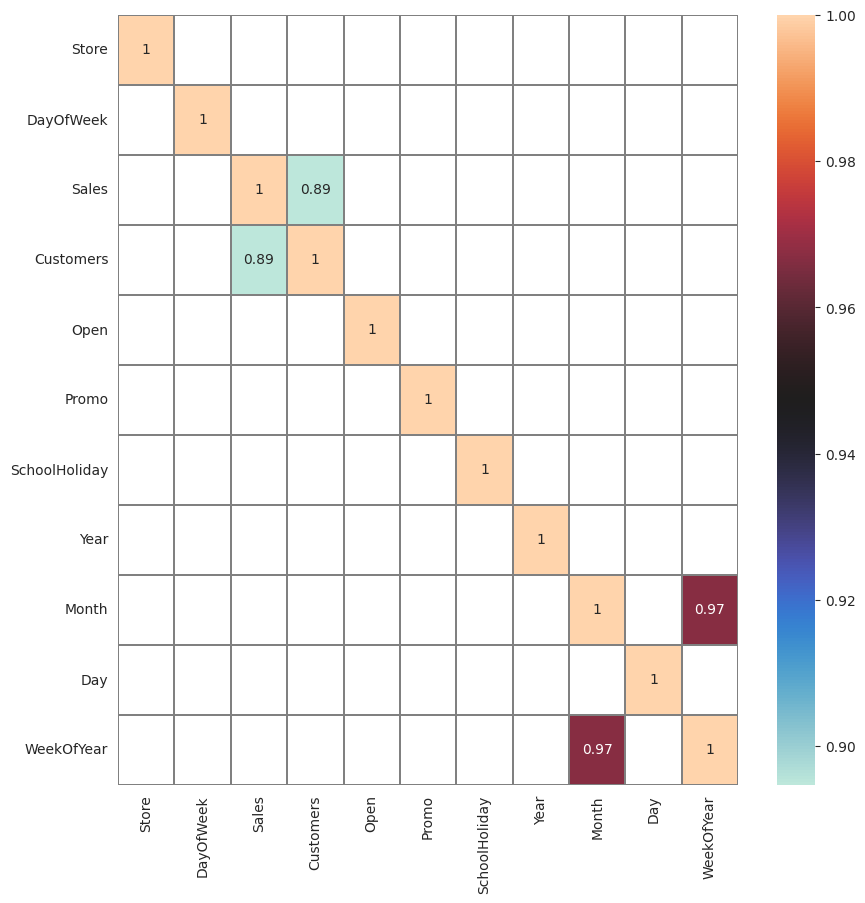

In [26]:
plt.figure(figsize=(10,10))
df_corr = rossman_df[rossman_df.columns].corr()
mask = df_corr.where(abs(df_corr)>=.70).isna()

sns.heatmap(df_corr ,mask = mask , annot = True , cmap ='icefire', linewidth = 0.2, linecolor = 'grey').set_facecolor('white')

##### 1. Why did you pick the specific chart?

We are using heatmap to check linear relationship, that is colinearity between valriables.
we are using 70% as threshold to show collinearity , we dont worry about less 70% collinear varibles.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Customers and sales are positive collinear, which shows as customers are increasing , sales also increasing.<br>
Month and week of year are very much collinear<br>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes, Management can focus on customers to get highers sales, which are very collniear.

#### Chart - 2

<ipython-input-27-fbad690778b0>:3: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



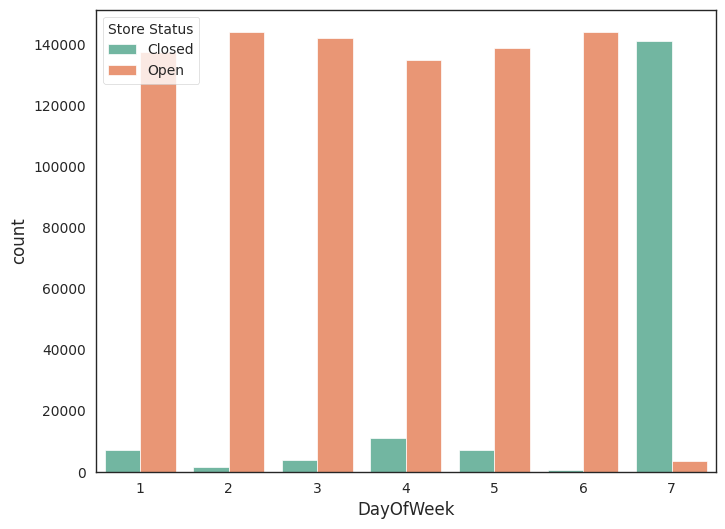

In [27]:
# Chart - 2 visualization code
custom_palette = sns.color_palette("Set2")
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df, palette=custom_palette )
plt.legend(title="Store Status", labels=['Closed', 'Open'])

##### 1. Why did you pick the specific chart?

Answer Here.
We have choosed this chart to check, on which day most of the stores are closed.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
As we can see that in the graph given below that Stores mainly closed on Sunday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3


<ipython-input-28-eecb0ddd3d91>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-28-eecb0ddd3d91>:4: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



Text(0, 0.5, 'Mean Sales')

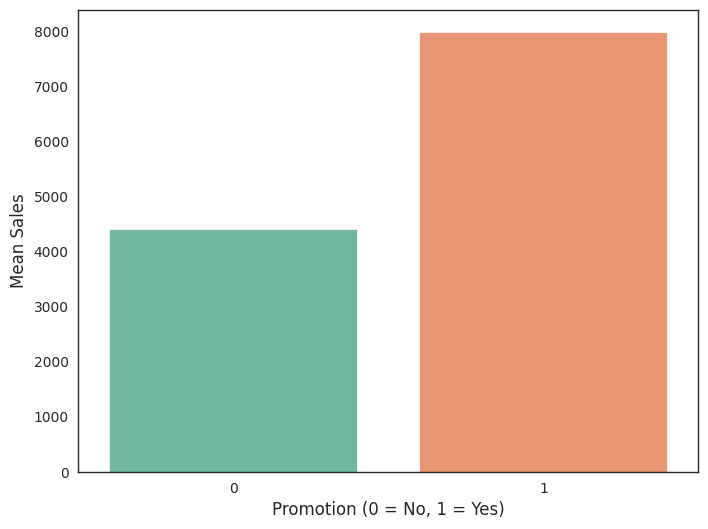

In [28]:
# Chart - 3 visualization code
custom_palette = sns.color_palette("Set2")
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'] , palette = custom_palette)
plt.xlabel("Promotion (0 = No, 1 = Yes)")
plt.ylabel("Mean Sales")

##### 1. Why did you pick the specific chart?


To know what is the impact of the promotions to the sales.

##### 2. What is/are the insight(s) found from the chart?

Sales are nearly doubled when promotions are running.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Promotion can lead to positive growth. Promotions can be managed wisely to ensure growth in sales

#### Chart - 4

<ipython-input-29-60d7bedf125e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-29-60d7bedf125e>:2: UserWarning:


The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.



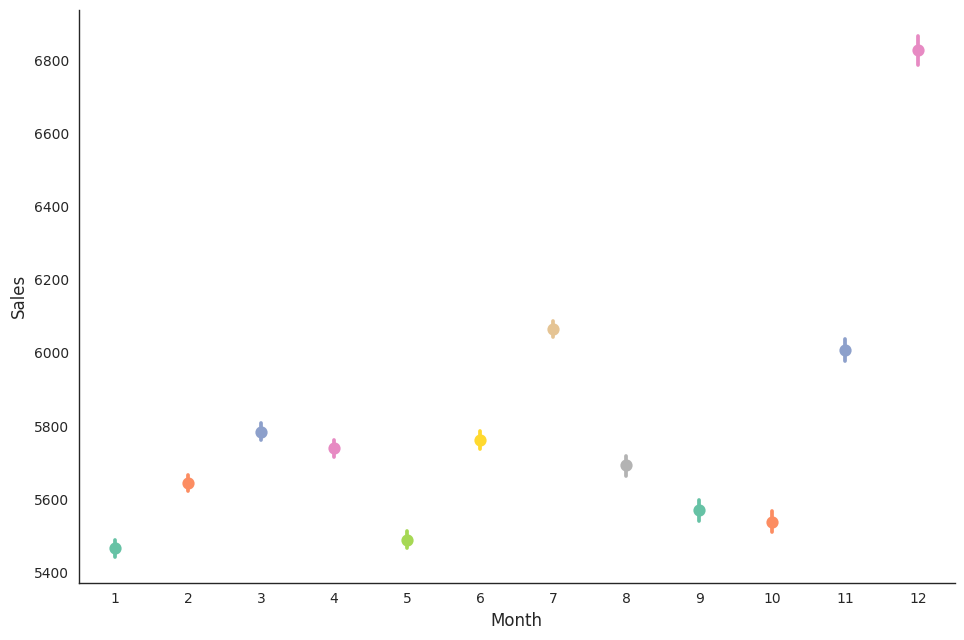

In [29]:
custom_palette = sns.color_palette("Set2")
sns.catplot(x="Month", y="Sales", data=rossman_df, kind="point", aspect=1.5, height=6.5, palette= custom_palette)

##### 1. Why did you pick the specific chart?

To know impact of the sales by months. Does there any seasonality for sales in particular months.

##### 2. What is/are the insight(s) found from the chart?

As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help in Optimization of staff allocation , inventory managermenet. Merketing and promotions


#### Chart - 5

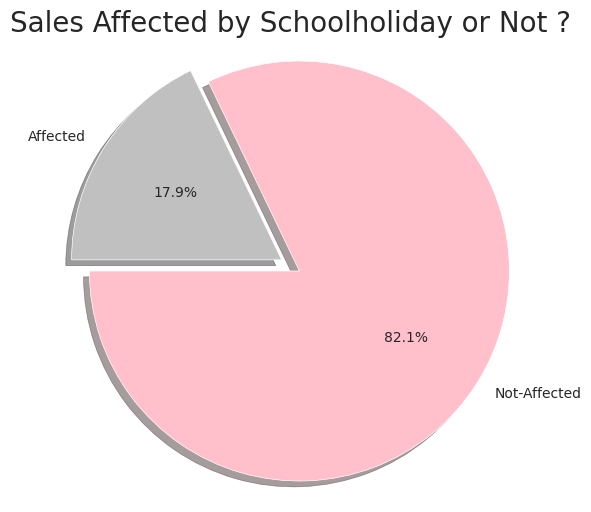

In [30]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['pink', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


##### 1. Why did you pick the specific chart?

To check whether sales are affected to Schoolholiday or Not. Which can help to do better decisions on holidays of stores

##### 2. What is/are the insight(s) found from the chart?

As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

School holidays are not leading to negative growth.

#### Chart - 6

In [31]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

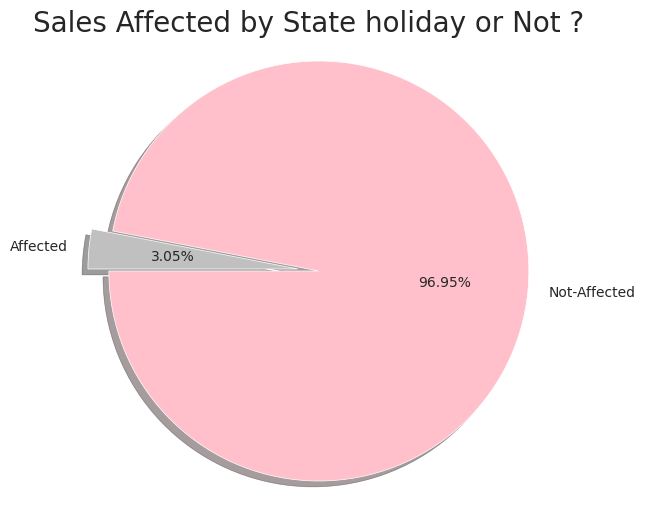

In [32]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['pink','silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%' , shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

To check whether State Holidays are affecting sales or not. Which can help to take decisions on holiday of stores.

##### 2. What is/are the insight(s) found from the chart?

As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Sales are not much affected by state holidays. Which states not to worry about state holidays.

In [33]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)

#### Chart - 7

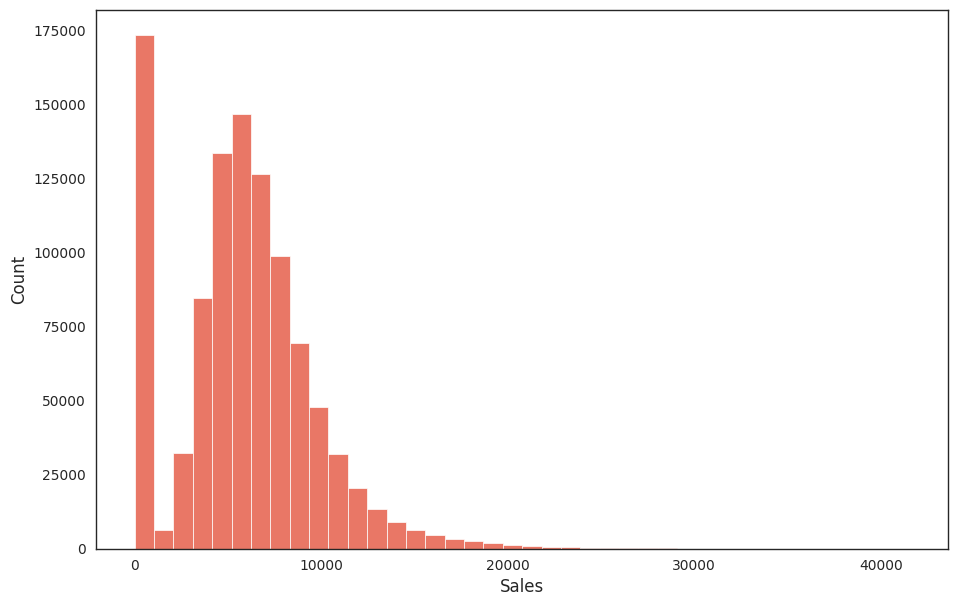

In [34]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(rossman_df['Sales'], kde = False,bins=40);

##### 1. Why did you pick the specific chart?

To check what is the distribution of sales.

##### 2. What is/are the insight(s) found from the chart?

Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='Sales', ylabel='Customers'>

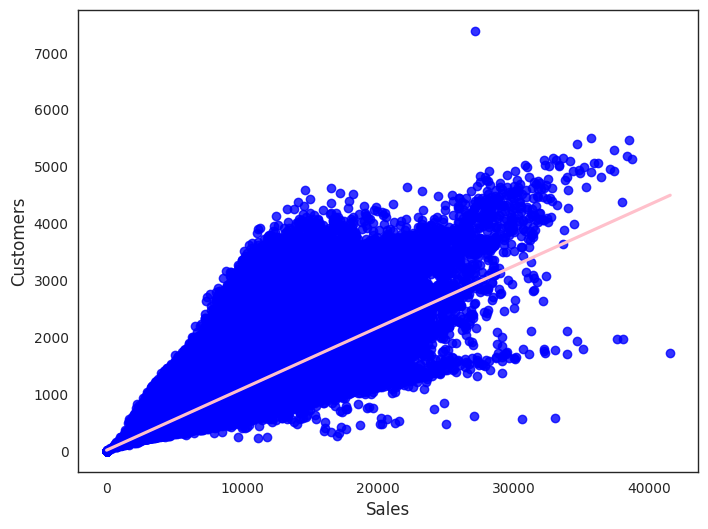

In [35]:
#linear relation between sales and customers
sns.regplot(x='Sales', y='Customers', data=rossman_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'pink'})

##### 1. Why did you pick the specific chart?

To check the relationship of sales and customers.

##### 2. What is/are the insight(s) found from the chart?

Sales are highly positive correlated to customers. Which means sales are increasing as customers are increasing and vice versa.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Attract customers to grow sales.

#### Chart - 9

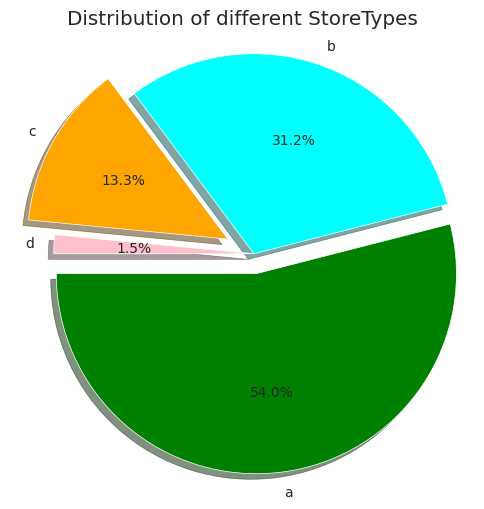

In [36]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['green', 'cyan' , 'orange' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


##### 1. Why did you pick the specific chart?

To check the proportion of store types we aare using pie chart.

##### 2. What is/are the insight(s) found from the chart?

More than half stores types are type a stores. type d are very less stores

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to identify where to give most of the attention, by looking at store type, by management team.

#### Chart - 10

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

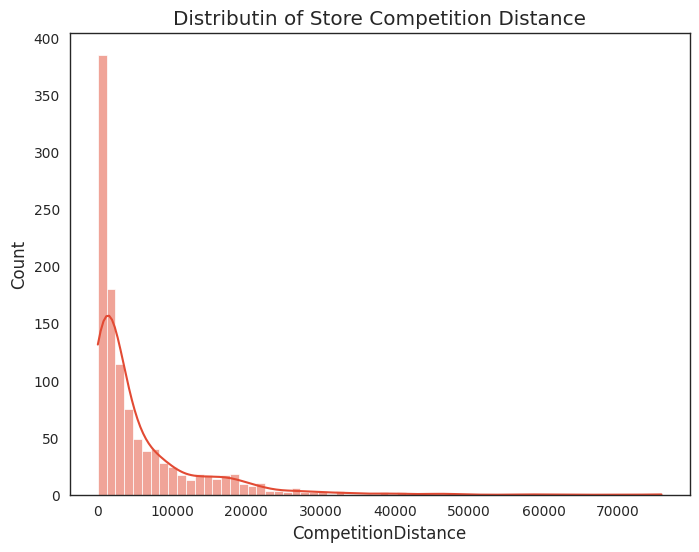

In [37]:
sns.histplot(store_df.CompetitionDistance.dropna(), kde=True)
plt.title("Distributin of Store Competition Distance")

##### 1. Why did you pick the specific chart?

CompetitionDistance is distance in meters to the nearest competitor store. To check its distribution.

##### 2. What is/are the insight(s) found from the chart?

Most of the stores is around 350 meters from competetion stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help for planning for new stores , and planning of promotions by distance from competetion stores.

#### Chart - 11

<ipython-input-38-63186a32f2ec>:5: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



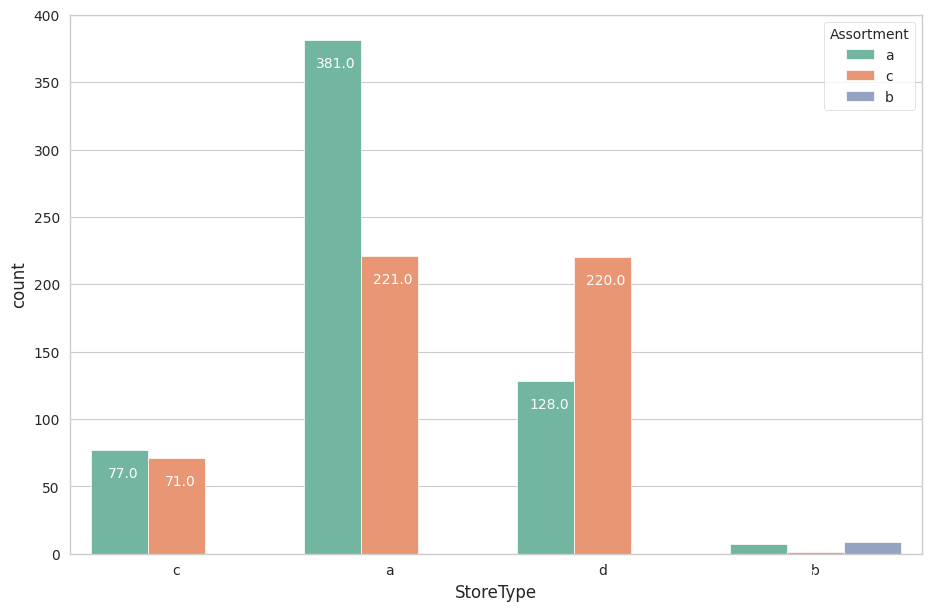

In [38]:
#checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette=custom_palette)

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

##### 1. Why did you pick the specific chart?

Checking stores with their assortment type, we are plotting above grouped bar plot.

##### 2. What is/are the insight(s) found from the chart?



Having an assortment of stores in a particular location can attract a diverse range of customers with different needs and preferences.The most selling and crowded store type is A.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The diversity of stores within an assortment provides shoppers with a wide selection and convenience in finding what they need in one location.




#### Chart - 12

<ipython-input-39-9ff5169f9be8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-39-9ff5169f9be8>:2: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



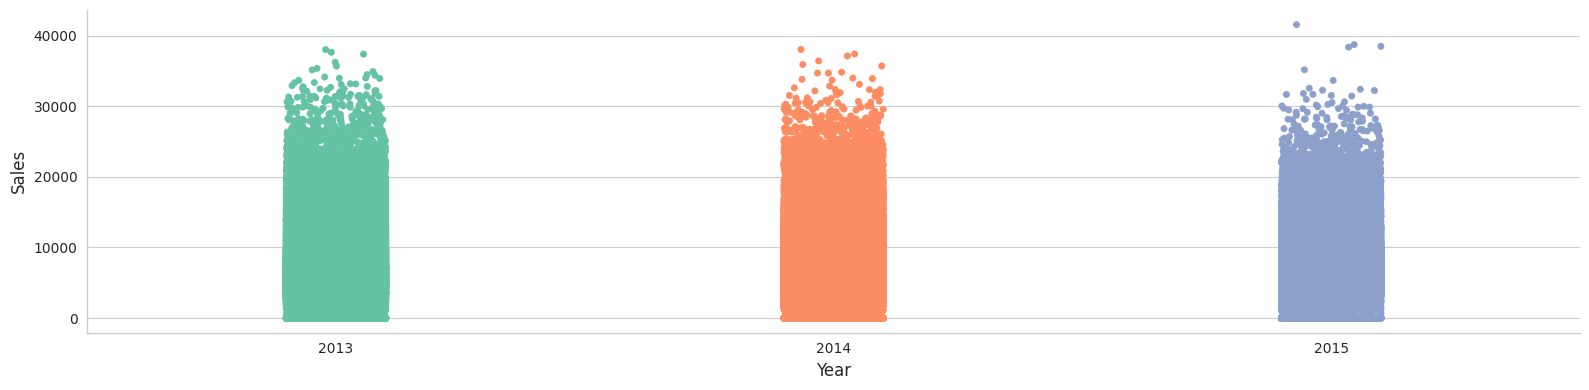

In [39]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 , palette = custom_palette )

##### 1. Why did you pick the specific chart?

To check sales by years, we are using catplot.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is not such significant differences in these 3 years in terms of sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Sales are not increasing by since many years. Management needs to thing new stratigies for growth in revenue.

#### ---Merging Two Datasets---EDA of Merged Dataset

In [40]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,...,31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,...,31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Chart - 13

In [41]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

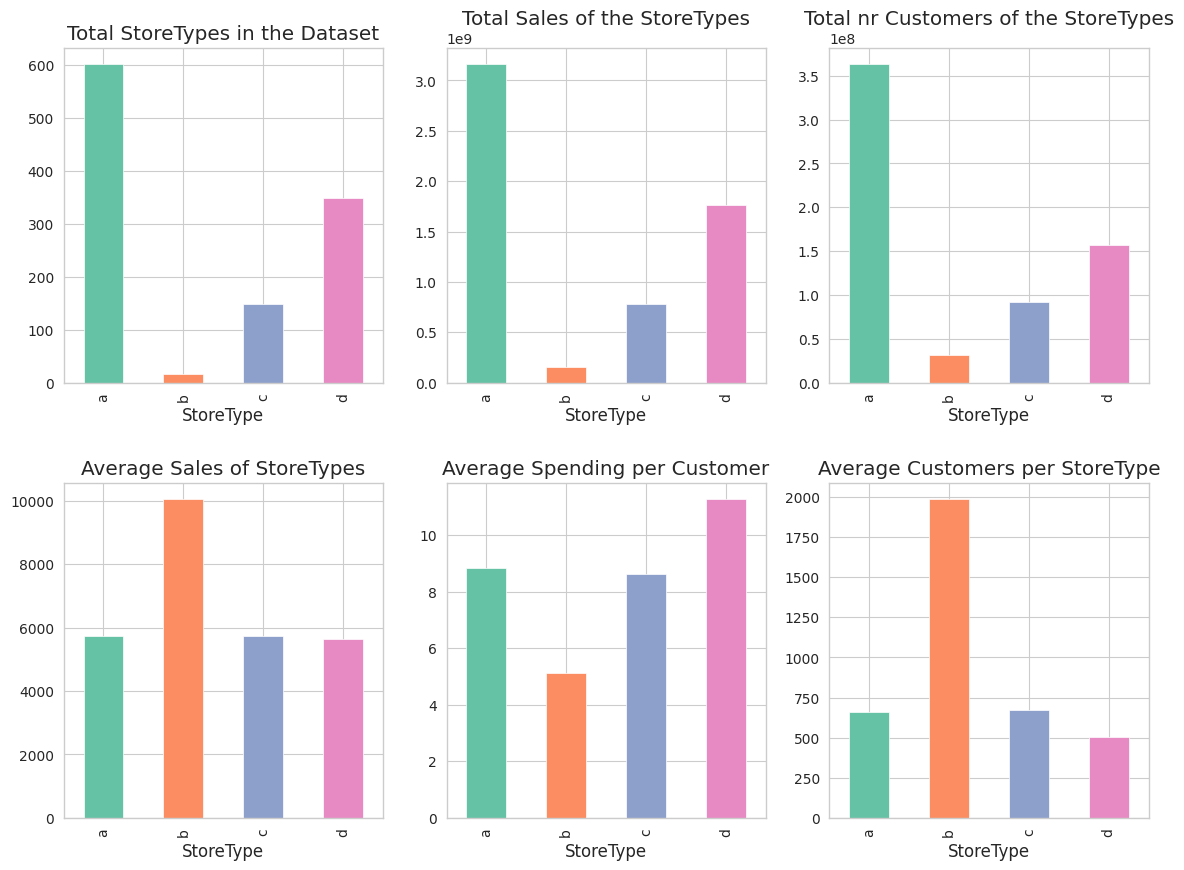

In [42]:
f, ax = plt.subplots(2, 3, figsize = (14,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset", color= custom_palette)
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes" , color= custom_palette)
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes", color= custom_palette)
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes", color= custom_palette)
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer", color= custom_palette)
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType", color= custom_palette)

plt.subplots_adjust(hspace = 0.3)
plt.show()

##### 1. Why did you pick the specific chart?

To check sales , avg customers by store types.

##### 2. What is/are the insight(s) found from the chart?

The most selling and crowded store type is A. <br>
StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.<br>
StoreTybe D had the highest buyer cart.<br>


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above chart helps in managing the store inventories and staffs by store types.

#### Chart - 14 - Correlation Heatmap

<ipython-input-43-e5ec343ee9e1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



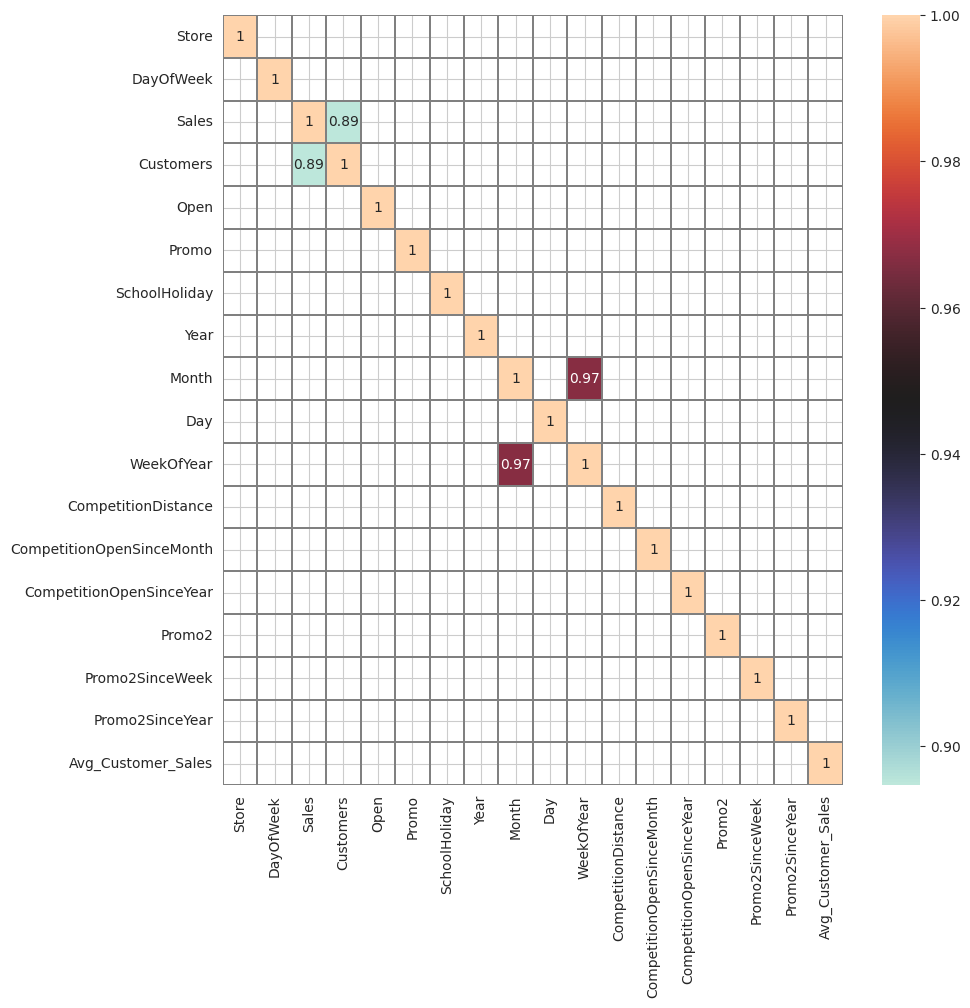

In [43]:
plt.figure(figsize=(10,10))
df_corr = df.corr()
mask = df_corr.where(abs(df_corr)>=.70).isna()
sns.heatmap(df_corr ,mask = mask , annot = True , cmap ='icefire', linewidth = 0.2, linecolor = 'grey').set_facecolor('white')

##### 1. Why did you pick the specific chart?

To check correlation between variables on merged dataset.

##### 2. What is/are the insight(s) found from the chart?

Weekoftheyear and Month are highly correlated

#### Chart - 15 - Pair Plot

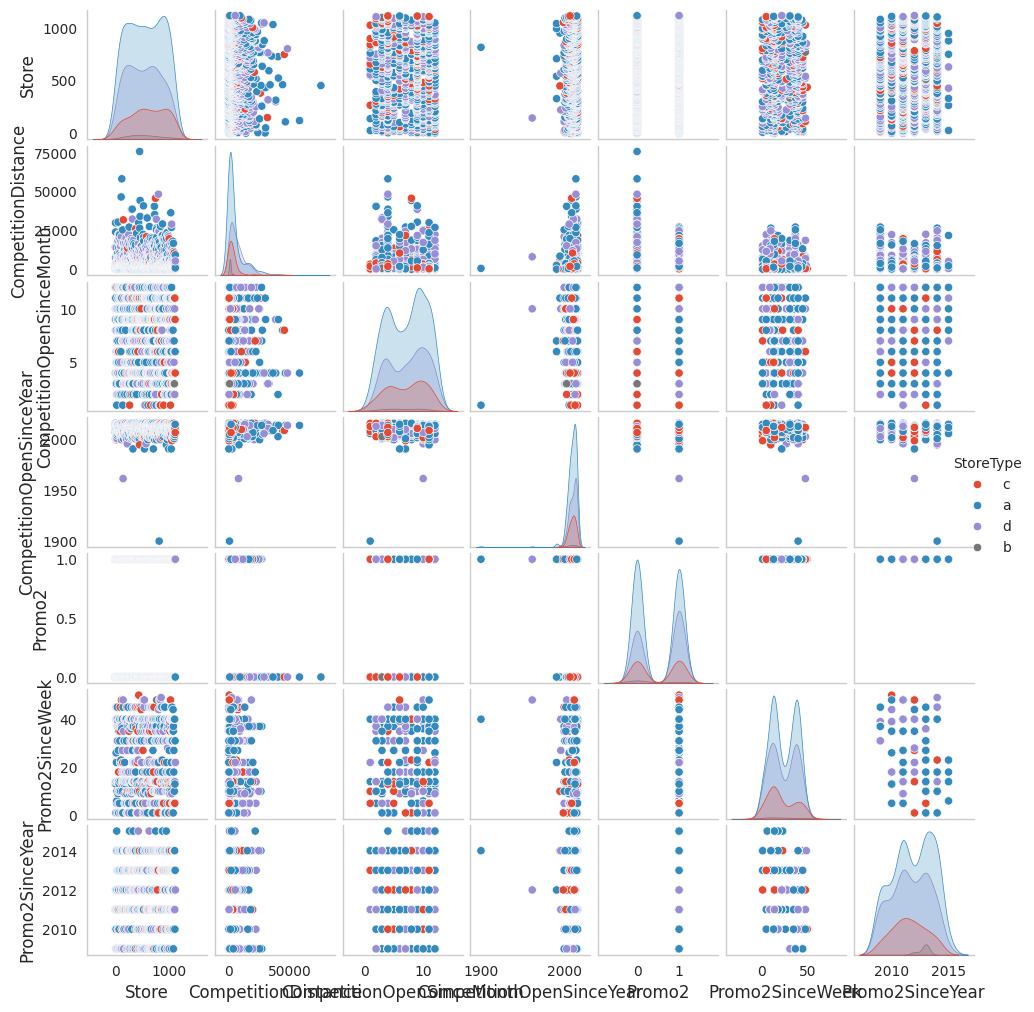

In [44]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

To show relationjships between the variables. And their distributions.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 16

<ipython-input-45-97ade9a46b64>:2: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



<Figure size 1000x1000 with 0 Axes>

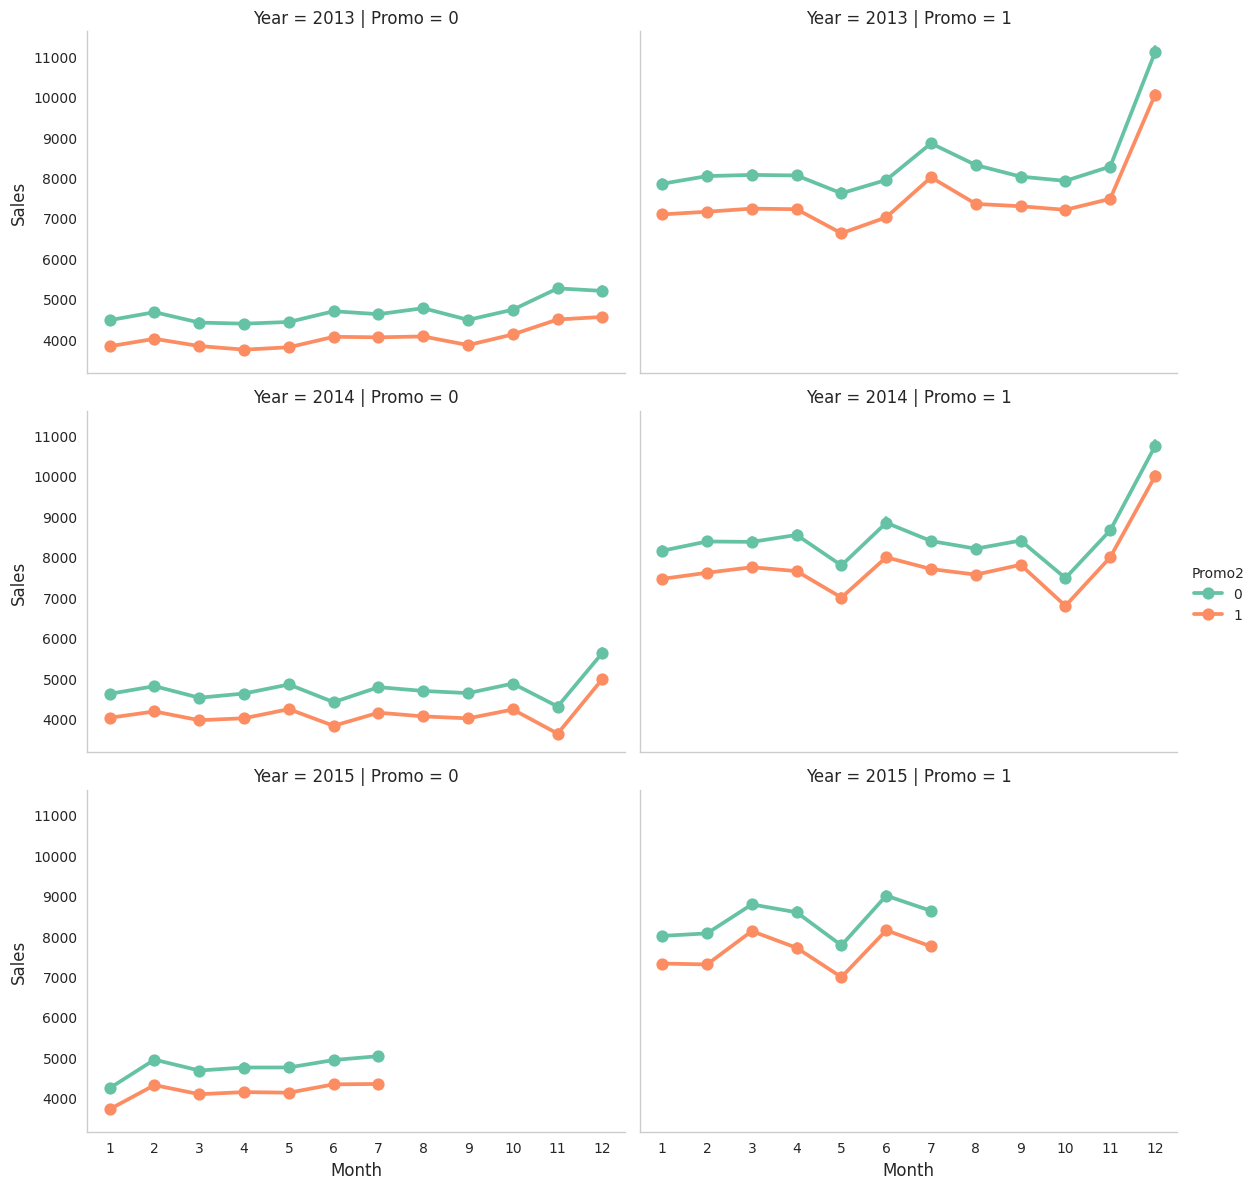

In [45]:
plt.figure(figsize=(10,10))
sns.catplot(data=df, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind="point", height=4, aspect=1.5 , palette=custom_palette)

plt.show()
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.

As We can see that when the promo is running Sales are high

#### Chart - 17

In [46]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

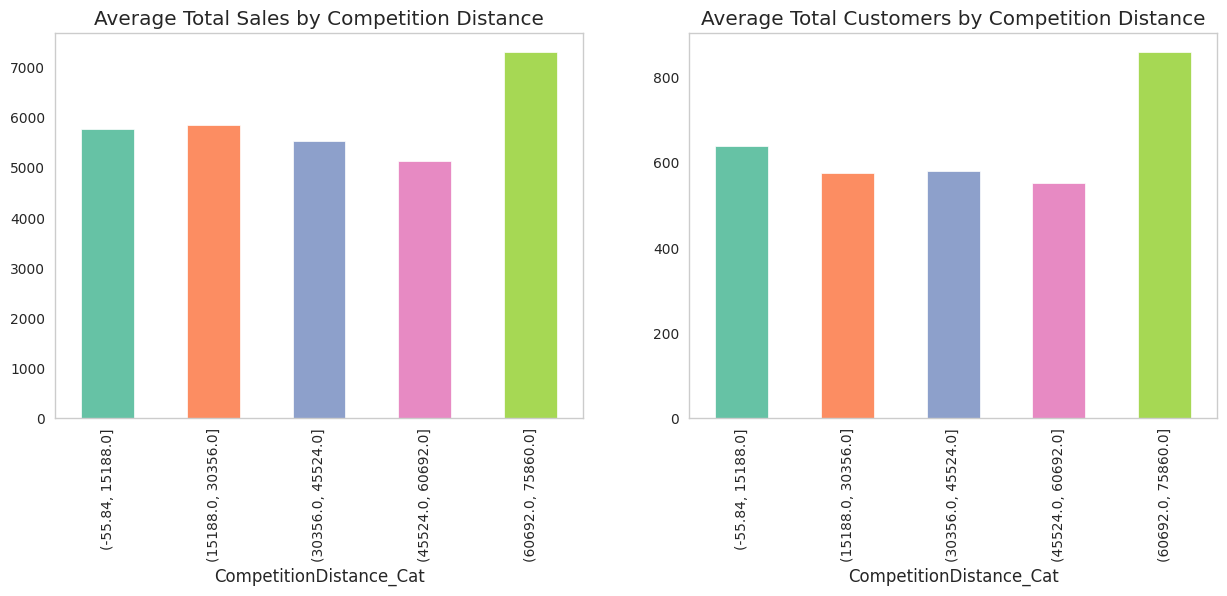

In [47]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0], color = custom_palette)
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1] , color = custom_palette)

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

#### Conclusion of analysis
**Sales are highly correlated to number of Customers.**

**The most selling and crowded store type is A.**

**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**

**StoreTybe D had the highest buyer cart.**

**Promo runs only in weekdays.**

**For all stores, Promotion leads to increase in Sales and Customers both.**

**More stores are opened during School holidays than State holidays.**

**The stores which are opened during School Holiday have more sales than normal days.**

**Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.**

**Promo2 doesnt seems to be correlated to any significant change in the sales amount.**

**Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) : Promotions do not have a significant effect on sales<br>
Alternative Hypothesis (H1):Promotions have a significant effect on sales<br>
<br>
Decision Rule:<br>
If the p-value is less than or equal to the significance level (0.05), reject the null hypothesis.<br>
If the p-value is greater than the significance level, fail to reject the null hypothesis

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
promo_sales = rossman_df[rossman_df['Promo'] == 1]['Sales']
non_promo_sales = rossman_df[rossman_df['Promo'] == 0]['Sales']


t_stat, p_value = ttest_ind(promo_sales, non_promo_sales, equal_var=False, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis - Promotions have a significant effect on sales.")
else:
    print("Fail to reject the null hypothesis - Promotions do not have a significant effect on sales.")

T-statistic: 512.3755316936371, P-value: 0.0
Reject the null hypothesis - Promotions have a significant effect on sales.


##### Which statistical test have you done to obtain P-Value?

a t-test

> Indented block



##### Why did you choose the specific statistical test?

for comparing means between two independent groups, a t-test is appropriate. In this case, use an independent samples t-test

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average number of customers is the same on School holidays and on regular days.<br>
Alternative Hypothesis (H1): The average number of customers is different on School holidays compared to regular days.<br>
<br>
Decision Making:<br>
Decide on a significance level (alpha = 0.05).<br>
Based on the p-value obtained from the statistical test, decide whether to reject the null hypothesis or fail to reject it.<br>

#### 2. Perform an appropriate statistical test.

In [49]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

rossman_df_open = rossman_df[rossman_df['Open'] == 1].copy()

rossman_df_open = rossman_df_open.dropna(subset=['Customers'])

rossman_df_open['SchoolHoliday'] = rossman_df_open['SchoolHoliday'].astype(str)


regular_day_customers = rossman_df_open[(rossman_df_open['SchoolHoliday'] == '0')]['Customers']

state_holiday_customers = rossman_df_open[rossman_df_open['SchoolHoliday'].isin(['a', 'b', 'c', '1'])]['Customers']

if not state_holiday_customers.empty and not regular_day_customers.empty:
    t_stat, p_val = ttest_ind(state_holiday_customers, regular_day_customers, equal_var=False, nan_policy='omit')

    print('State Holiday Mean:', state_holiday_customers.mean())
    print('Regular Day Mean:', regular_day_customers.mean())
    print('T-Statistic:', t_stat)
    print('P-Value:', p_val)

    alpha = 0.05
    if p_val < alpha:
        print('Reject the null hypothesis - Significant difference in the number of customers.')
    else:
        print('Fail to reject the null hypothesis - No significant difference in the number of customers.')



State Holiday Mean: 783.1210899502621
Regular Day Mean: 757.83317203551
T-Statistic: 22.8848520020794
P-Value: 8.67800468202786e-116
Reject the null hypothesis - Significant difference in the number of customers.


##### Which statistical test have you done to obtain P-Value?

T-test

##### Why did you choose the specific statistical test?

Since we are comparing the means of two independent samples, we can use a two-sample t-test. <br>

### Hypothetical Statement - 3


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average sales are the same across all store types.<br>
Alternative Hypothesis (H1): The average sales differ between at least two store types.<br>

Decision Making:<br>
Based on the p-value obtained from the ANOVA test, decide whether to reject the null hypothesis or fail to reject it.

#### 2. Perform an appropriate statistical test.

In [50]:
import pandas as pd
from scipy.stats import f_oneway


merged_df = pd.merge(store_df, rossman_df, on='Store')


sales_data = merged_df[['StoreType', 'Sales']].dropna()

average_sales_by_store_type = sales_data.groupby('StoreType')['Sales'].mean()


store_type_groups = [group[1] for group in sales_data.groupby('StoreType')['Sales']]
f_stat, p_val = f_oneway(*store_type_groups)

print('Average Sales by Store Type:')
print(average_sales_by_store_type)
print('F-Statistic:', f_stat)
print('P-Value:', p_val)


alpha = 0.05
if p_val < alpha:
    print('Reject the null hypothesis - Significant difference in average sales among store types.')
else:
    print('Fail to reject the null hypothesis - No significant difference in average sales among store types.')


Average Sales by Store Type:
StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64
F-Statistic: 6817.19201183629
P-Value: 0.0
Reject the null hypothesis - Significant difference in average sales among store types.


##### Which statistical test have you done to obtain P-Value?

F-test or Anova test

##### Why did you choose the specific statistical test?

ANOVA is specifically designed to compare the means of three or more groups simultaneously.<br>In this case, we have more than two store types ( 'a', 'b', 'c', 'd')

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [51]:
# Handling Missing Values & Missing Value Imputation
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [52]:
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

**we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.** <br>
**we are using median for imputing feature with less than 30% missing values**.

### 2. Handling Outliers

<ipython-input-53-513a3d46b18a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-513a3d46b18a>:3: UserWarning:

The palette list has more values (8) than needed (1), which may not be intended.



<Axes: ylabel='Sales'>

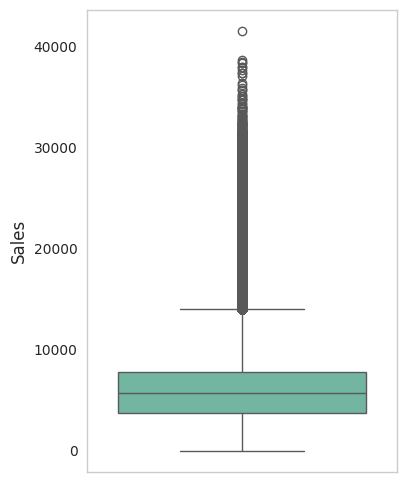

In [53]:
#checking outliers in sales
plt.figure(figsize=(4,6))
sns.boxplot(rossman_df['Sales'], palette = custom_palette)


In [54]:
def remove_outlier(df_in, col_name):
    z_scores = zscore(df_in[col_name])
    df_out = df_in[(z_scores > -1.5) & (z_scores < 1.5)]  # Adjust the z-score threshold as needed
    return df_out

df_no_outliers = remove_outlier(df, 'Sales')

<ipython-input-55-420bcc091ced>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-55-420bcc091ced>:3: UserWarning:

The palette list has more values (8) than needed (1), which may not be intended.



<Axes: ylabel='Sales'>

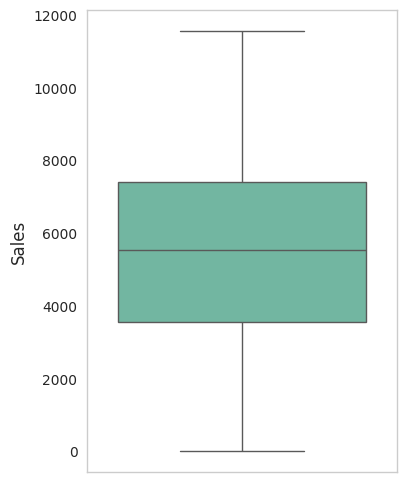

In [55]:
#checking outliers in sales
plt.figure(figsize=(4,6))
sns.boxplot(df_no_outliers['Sales'], palette = custom_palette)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Box plot shows that we have a very high outliers in sales. We are using z-score technique to remove outliers in sales column.**

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

We are using pd.get_dummies for categorical encoding , in next step.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [56]:
# Manipulate Features to minimize feature correlation and create new features
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [57]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [58]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [59]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [60]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [61]:
df_new=df.copy()

Categorical encoding using dummies

In [62]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [63]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,...,PromoInterval,Avg_Customer_Sales,CompetitionDistance_Cat,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,...,NaN,9.482883,"(-55.84, 15188.0]",0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,...,"Jan,Apr,Jul,Oct",9.702400,"(-55.84, 15188.0]",1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,...,"Jan,Apr,Jul,Oct",10.126675,"(-55.84, 15188.0]",1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,...,NaN,9.342457,"(-55.84, 15188.0]",0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,...,NaN,8.626118,"(15188.0, 30356.0]",1,0,0,0,1,0,0


#### 2. Feature Selection

In [64]:
selected_features = ['Customers', 'Promo', 'SchoolHoliday', 'Month', 'Day',
                     'WeekOfYear', 'CompetitionDistance', 'Promo2', 'StoreType_a',
                     'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
                     'Assortment_b', 'Assortment_c']
new_df_selected = df_new[selected_features]

##### What all feature selection methods have you used  and why?

We dont columns like date , promoInterval , avg_customer sales , lattitude , longitude related columns. These columns are not helpting in ml model, but it will create problem for model in learning.

##### Which all features you found important and why?

We feel store type and promotions are most important features.




### 5. Data Transformation

In [65]:
imputer = SimpleImputer(strategy='median')
new_df_selected_imputed = pd.DataFrame(imputer.fit_transform(new_df_selected), columns=new_df_selected.columns)

There are some NaN values in dataset , which were causing error in applying PCA , hence we have applied simple imputer using median to fill NaN values.

In [66]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df_selected_imputed)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We have used standard scaler here. Transformating data to make in one one scale is very important for ml model. But we will train model on both scaled and orginal data to see the performances.

### 6. Data Scaling

In [67]:
# We have used standard scaler for scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Applying PCA might help in reducing some noise in dataset , hence e will use PCA here.

In [68]:
# Step 4: Dimensionality Reduction (Optional)
pca = PCA(n_components=0.95)  # Retain 95% of variance
reduced_data = pca.fit_transform(scaled_data)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

we are using principle components analysis, which is best dimensionality reduction technique used in data sceince community.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(reduced_data, df_new['Sales'], test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

We are using train test split from library scikit learn. We are using 20% data as test data and 80% as train data.

### 9. Handling Imbalanced Dataset

In [70]:
# target_column = 'Sales'

# # Count the occurrences of each class in the target variable
# class_counts = df_new[target_column].value_counts()

# # Calculate the class distribution as percentages
# class_distribution = class_counts / class_counts.sum() * 100

# # Display the class distribution
# print("Class Distribution:")
# print(class_distribution)

# # Visualize the class distribution (optional)
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.barplot(x=class_counts.index, y=class_counts.values)
# plt.title("Class Distribution")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

Distribution is like symmetrical. We might not need to apply SMOTE for handling imbalance dataset.

In [71]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [72]:
#Util Functions
results_dict = {}
def evaluate_and_print_results(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape_error = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} R^2 Score: {r2}")
    print(f"{model_name} MAPE Score: {mape_error}")
    print("\n")

    # Append results to the dictionary
    results_dict[model_name] = {
        'RMSE': rmse,
        'R^2 Score': r2,
        'MAPE Score' : mape_error
    }

def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred,palette=custom_palette)
    plt.title(f"{model_name} - True vs Predicted Values")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

### ML Model - 1

In [73]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_linear_reg, linear_reg_model)
# plot_predictions(y_test, y_pred_linear_reg, linear_reg_model)

LinearRegression() RMSE: 1349.1263909013942
LinearRegression() R^2 Score: 0.8113757678135247
LinearRegression() MAPE Score: 0.1482582693228633




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

Lasso Regression

In [75]:
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10]
}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_lasso, best_lasso_model)
# plot_predictions(y_test, y_pred_lasso, best_lasso_model)

Lasso(alpha=0.01) RMSE: 1349.1264640312793
Lasso(alpha=0.01) R^2 Score: 0.8113757473646344
Lasso(alpha=0.01) MAPE Score: 0.14825898901345747




Ridge Regression

In [76]:
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10]
}

grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_ridge, best_ridge_model)
# plot_predictions(y_test, y_pred_ridge, best_ridge_model)

Ridge(alpha=1) RMSE: 1349.126385130704
Ridge(alpha=1) R^2 Score: 0.8113757694271497
Ridge(alpha=1) MAPE Score: 0.14825838021560256




Polynomial Regression

In [77]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_poly, "Polynomial Regression(Degree-2)")
# plot_predictions(y_test, y_pred_poly, "Polynomial Regression(Degree-2)")


Polynomial Regression(Degree-2) RMSE: 1156.5389995702774
Polynomial Regression(Degree-2) R^2 Score: 0.8613841879066644
Polynomial Regression(Degree-2) MAPE Score: 0.12840967336014672




##### Which hyperparameter optimization technique have you used and why?

We are using gridsearchCV for hyper parameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes . We can see improvements after the gridsearchcv.<br>
Polynomial Regression(Degree-2) RMSE: 1156.5389995702774 <br>
Polynomial Regression(Degree-2) R^2 Score: 0.8613841879066644<br>
Polynomial Regression(Degree-2) MAPE Score: 0.12840967336014672

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
param_grid_decision_tree = {
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}
# WE have searched best hyperparamters in previous iterations.
grid_search_decision_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_decision_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_decision_tree.fit(X_train, y_train)
best_decision_tree_model = grid_search_decision_tree.best_estimator_
y_pred_decision_tree = best_decision_tree_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_decision_tree, best_decision_tree_model)
# plot_predictions(y_test, y_pred_decision_tree, best_decision_tree_model)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) RMSE: 1180.2148501278114
DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) R^2 Score: 0.8556508073908284
DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) MAPE Score: 0.12427259351740831




#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# We have finalized some hyperparameters , after training on parameters using gridsearchCV.

##### Which hyperparameter optimization technique have you used and why?

We have finalized some hyperparameters , after training on parameters using gridsearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) RMSE: 1179.907612718757
DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) R^2 Score: 0.8557259525211094
DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) MAPE Score: 0.12428531421471634


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [80]:
# param_grid_random_forest = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search_random_forest = GridSearchCV(RandomForestRegressor(), param_grid_random_forest, cv=5, scoring='neg_mean_squared_error')
# grid_search_random_forest.fit(X_train, y_train)
# best_random_forest_model = grid_search_random_forest.best_estimator_
# y_pred_random_forest = best_random_forest_model.predict(X_test)
# evaluate_and_print_results(y_test, y_pred_random_forest, best_random_forest_model)
# # plot_predictions(y_test, y_pred_random_forest, best_random_forest_model)

In [81]:
# # WE have searched best hyperparamters in previous iterations.
# # { n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

# rf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
# rfreg = rf.fit(X_train, y_train)
# y_pred_random_forest = rfreg.predict(X_test)
# evaluate_and_print_results(y_test, y_pred_random_forest, "Random Forest(n_estimator=80)")
# # plot_predictions(y_test, y_pred_random_forest, best_random_forest_model)

Model size is too big , hence we are commenting out the code.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest(n_estimator=80) RMSE: 1007.853701590495 <br>
Random Forest(n_estimator=80) R^2 Score: 0.8947342231806028 <br>
Random Forest(n_estimator=80) MAPE Score: 0.10849044228652


#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# we have written util function  for this stage

##### Which hyperparameter optimization technique have you used and why?

we have used GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we have seen lots of imporvements , random forest regressor is best  performed model.<br>
Random Forest(n_estimator=80) RMSE: 1007.853701590495 <br>
Random Forest(n_estimator=80) R^2 Score: 0.8947342231806028 <br>
Random Forest(n_estimator=80) MAPE Score: 0.10849044228652


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [83]:
results_df = pd.DataFrame(results_dict).transpose()
results_df

,RMSE,R^2 Score,MAPE Score
LinearRegression(),1349.126391,0.811376,0.148258
Lasso(alpha=0.01),1349.126464,0.811376,0.148259
Ridge(alpha=1),1349.126385,0.811376,0.148258
Polynomial Regression(Degree-2),1156.539000,0.861384,0.128410
"DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)",1180.214850,0.855651,0.124273


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We are choosing random forest regressor.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [84]:
# def plot_feature_importance(importance,names,model_type):

#   #Create arrays from feature importance and feature names
#   feature_importance = np.array(importance)
#   feature_names = np.array(names)

#   #Create a DataFrame using a Dictionary
#   data={'feature_names':feature_names,'feature_importance':feature_importance}
#   fi_df = pd.DataFrame(data)

#   #Sort the DataFrame in order decreasing feature importance
#   fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#   #Define size of bar plot
#   plt.figure(figsize=(10,8))
#   #Plot Searborn bar chart
#   sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#   #Add chart labels
#   plt.title(model_type + ' FEATURE IMPORTANCE')
#   plt.xlabel('FEATURE IMPORTANCE')
#   plt.ylabel('FEATURE NAMES')

In [85]:
# plot_feature_importance(rfreg.feature_importances_,columns[:],'RANDOM FOREST')

<!-- def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES') -->

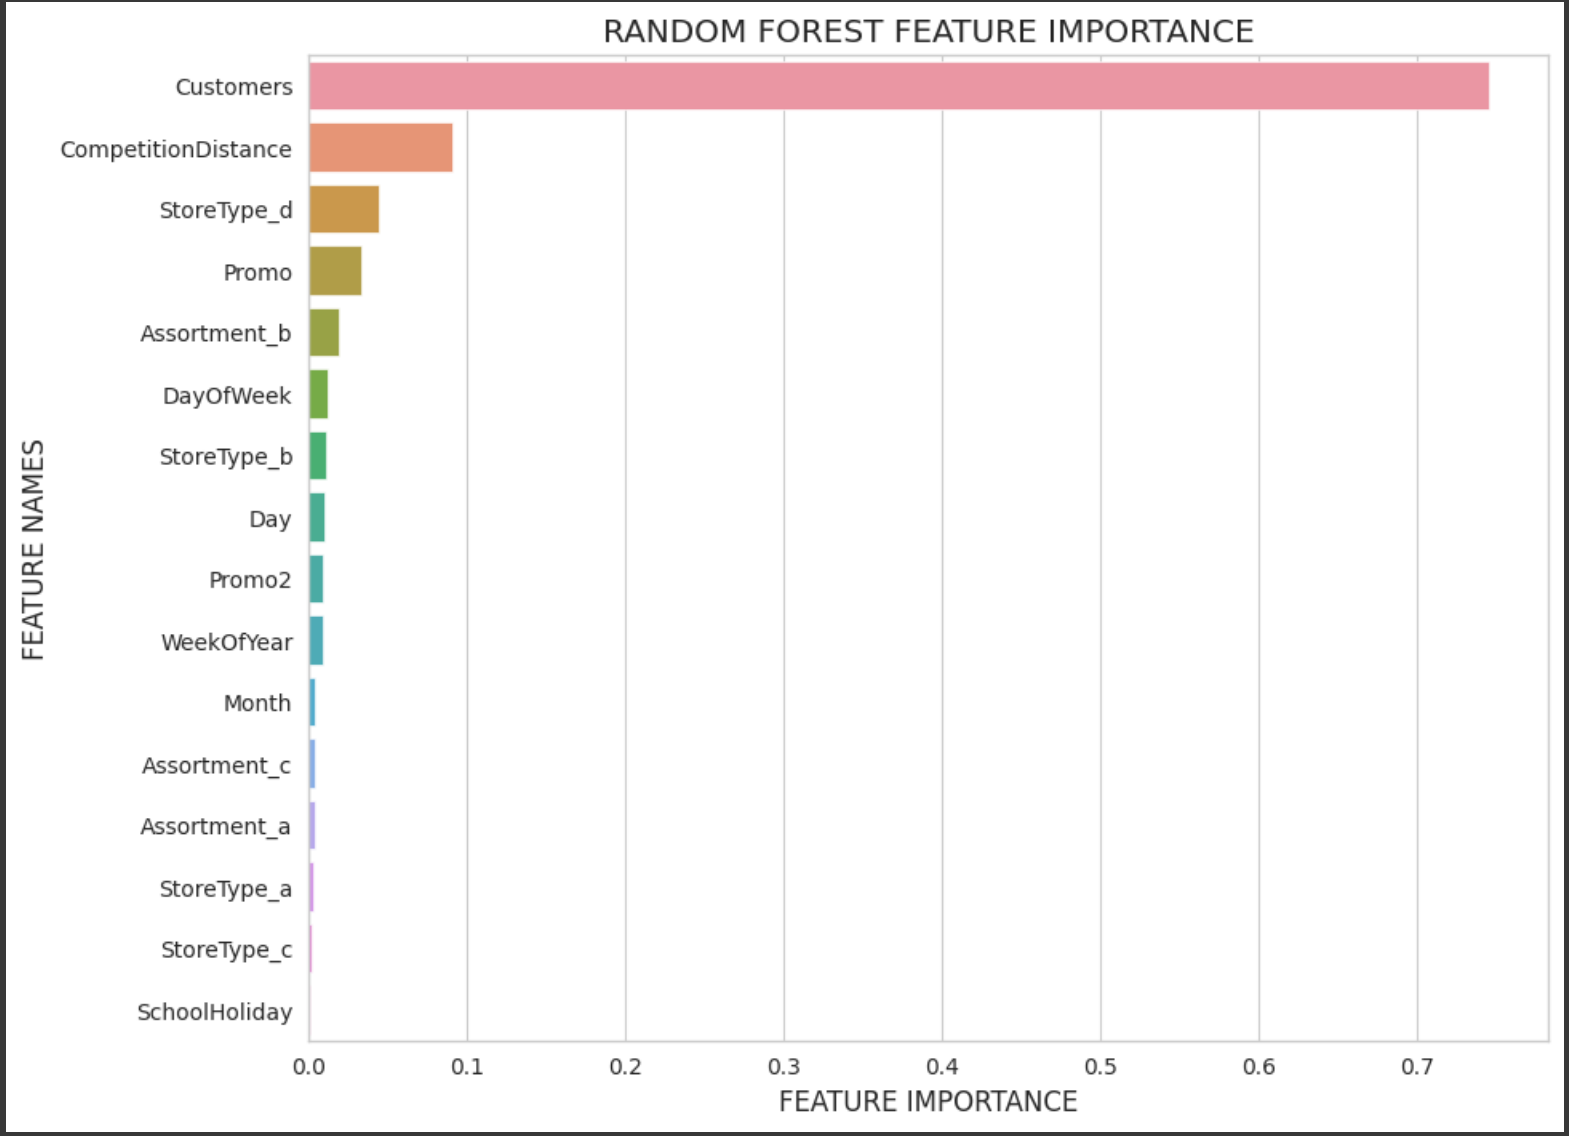

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [86]:
# from google.colab import drive
# drive.mount('/content/drive')

In [87]:
# import joblib
# filename = 'finalized_model.sav'
# joblib.dump(rfreg, filename)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [88]:
# import joblib
# filename = 'finalized_model.sav'
# rfreg = joblib.load(filename)
# rfreg.predict(X_train)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Random Forest regressor is best trained model on above dataset. with below parameters.<br>
 { n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }<br>
Which results below metrics
Random Forest(n_estimator=80) RMSE: 1007.853701590495 <br>
Random Forest(n_estimator=80) R^2 Score: 0.8947342231806028 <br>
Random Forest(n_estimator=80) MAPE Score: 0.10849044228652

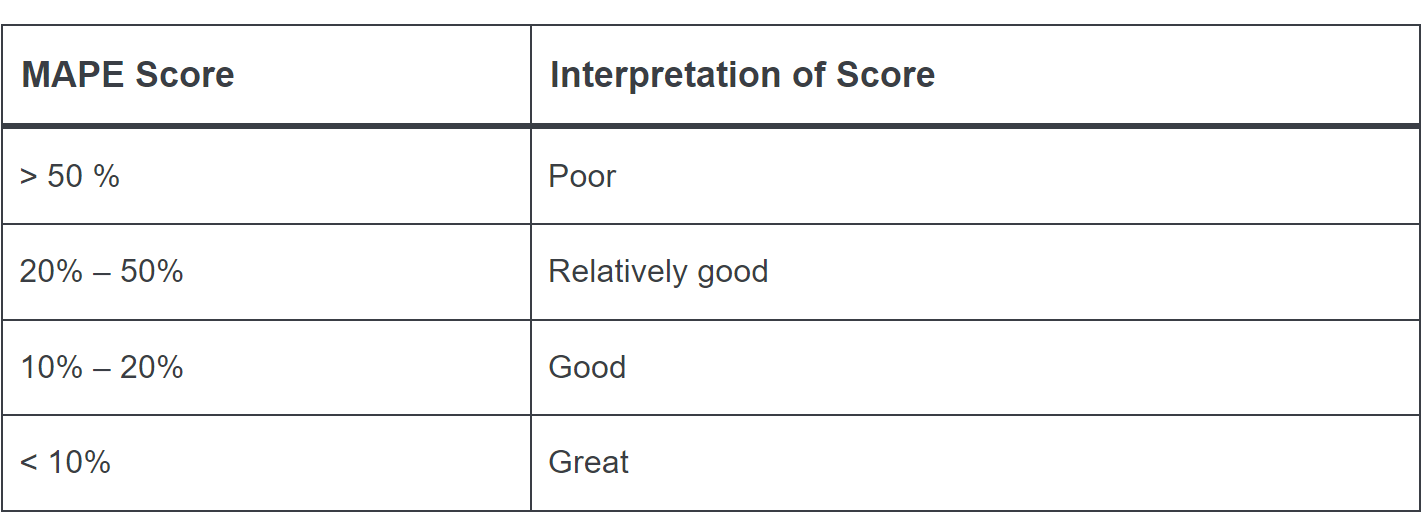

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***